In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Datasets/HousePriceIndia/ProcessedPrice.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     13859 non-null  int64  
 1   number of bathrooms                    13859 non-null  float64
 2   living area                            13859 non-null  int64  
 3   lot area                               13859 non-null  int64  
 4   number of floors                       13859 non-null  float64
 5   waterfront present                     13859 non-null  int64  
 6   condition of the house                 13859 non-null  int64  
 7   grade of the house                     13859 non-null  int64  
 8   Area of the house(excluding basement)  13859 non-null  int64  
 9   Area of the basement                   13859 non-null  int64  
 10  Built Year                             13859 non-null  int64  
 11  Re

In [4]:
data.drop("waterfront present" , axis = 1 , inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     13859 non-null  int64  
 1   number of bathrooms                    13859 non-null  float64
 2   living area                            13859 non-null  int64  
 3   lot area                               13859 non-null  int64  
 4   number of floors                       13859 non-null  float64
 5   condition of the house                 13859 non-null  int64  
 6   grade of the house                     13859 non-null  int64  
 7   Area of the house(excluding basement)  13859 non-null  int64  
 8   Area of the basement                   13859 non-null  int64  
 9   Built Year                             13859 non-null  int64  
 10  Renovation Year                        13859 non-null  int64  
 11  La

In [6]:
correlation_col = data[['living area','Area of the house(excluding basement)','living_area_renov']]

In [7]:
corr_matrix = correlation_col.corr()

In [8]:
print(corr_matrix)

                                       living area  \
living area                               1.000000   
Area of the house(excluding basement)     0.853529   
living_area_renov                         0.743280   

                                       Area of the house(excluding basement)  \
living area                                                         0.853529   
Area of the house(excluding basement)                               1.000000   
living_area_renov                                                   0.725427   

                                       living_area_renov  
living area                                     0.743280  
Area of the house(excluding basement)           0.725427  
living_area_renov                               1.000000  


In [9]:
corr_matrix

,living area,Area of the house(excluding basement),living_area_renov
living area,1.000000,0.853529,0.743280
Area of the house(excluding basement),0.853529,1.000000,0.725427
living_area_renov,0.743280,0.725427,1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

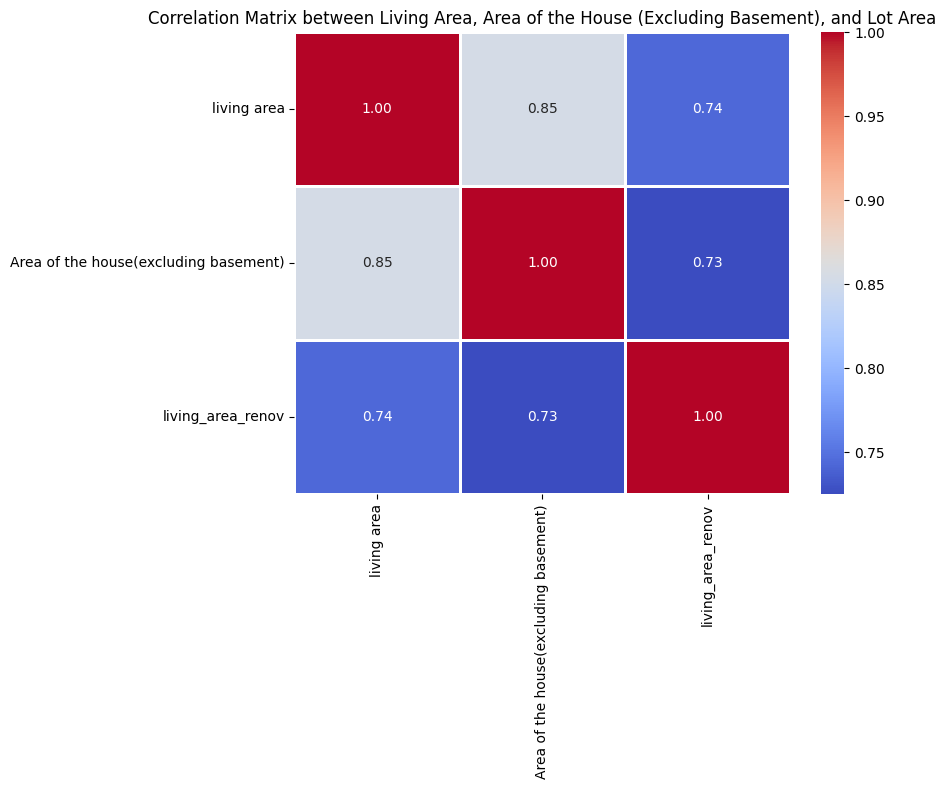

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1)
plt.title('Correlation Matrix between Living Area, Area of the House (Excluding Basement), and Lot Area')
plt.show()

In [12]:
data.drop("Area of the house(excluding basement)" , axis = 1 , inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number of bedrooms         13859 non-null  int64  
 1   number of bathrooms        13859 non-null  float64
 2   living area                13859 non-null  int64  
 3   lot area                   13859 non-null  int64  
 4   number of floors           13859 non-null  float64
 5   condition of the house     13859 non-null  int64  
 6   grade of the house         13859 non-null  int64  
 7   Area of the basement       13859 non-null  int64  
 8   Built Year                 13859 non-null  int64  
 9   Renovation Year            13859 non-null  int64  
 10  Lattitude                  13859 non-null  float64
 11  Longitude                  13859 non-null  float64
 12  living_area_renov          13859 non-null  int64  
 13  lot_area_renov             13859 non-null  int

In [22]:
correlation_col = data[['lot area','grade of the house','Year since renovation','number of bedrooms','condition of the house','Price','Number of schools nearby']]
corr_matrix = correlation_col.corr()
corr_matrix 

,lot area,grade of the house,Year since renovation,number of bedrooms,condition of the house,Price,Number of schools nearby
lot area,1.000000,0.097238,0.015589,0.024942,-0.004667,0.096008,-0.010289
grade of the house,0.097238,1.000000,-0.041984,0.318161,-0.177237,0.647629,-0.000772
Year since renovation,0.015589,-0.041984,1.000000,-0.016606,-0.021724,0.053971,-0.009069
number of bedrooms,0.024942,0.318161,-0.016606,1.000000,0.023747,0.298872,-0.000453
condition of the house,-0.004667,-0.177237,-0.021724,0.023747,1.000000,0.044879,-0.009987
Price,0.096008,0.647629,0.053971,0.298872,0.044879,1.000000,0.004843
Number of schools nearby,-0.010289,-0.000772,-0.009069,-0.000453,-0.009987,0.004843,1.000000


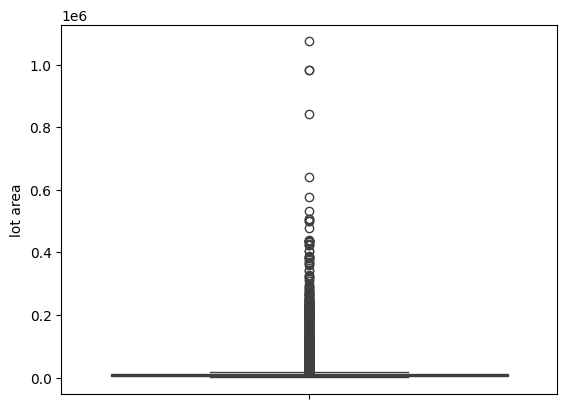

In [24]:
sns.boxplot(data['lot area'])
plt.show()

In [26]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
IQR = q3-q1
lower_bound = q1 -1.5*IQR
upper_bound = q3 + 1.5*IQR
outliers = data[(data['Price'] <lower_bound ) | (data['Price'] > upper_bound)]
outliers

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,condition of the house,grade of the house,Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Age,Year since renovation
73,4,2.50,4340,141570,2.5,3,11,0,1992,0,52.9105,-114.238,2720,97138,1,73,1090000,32,0
74,5,2.75,3190,16920,1.0,3,9,1500,1976,0,52.7941,-114.350,3100,13100,1,53,1030000,48,0
154,3,2.50,2200,1970,2.0,3,9,590,2008,0,52.8726,-114.517,1890,3505,3,65,1050000,16,0
232,4,1.50,2310,13300,1.0,3,7,420,1950,0,52.8532,-114.400,2840,12744,2,61,1110000,74,0
233,4,3.50,3900,8391,2.0,3,10,0,2006,0,52.9279,-114.395,3820,12268,2,73,1040000,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,4,3.00,3180,4649,2.0,4,9,1110,1925,0,52.8883,-114.463,2720,5980,3,77,1130000,99,0
13590,4,4.50,4920,270236,2.0,3,10,1100,2006,0,52.6995,-113.965,4920,260924,2,53,1040000,18,0
13717,5,2.75,3300,7560,2.0,3,10,0,2007,0,52.8767,-114.308,3150,8580,3,59,1110000,17,0
13718,4,2.50,3170,47502,2.0,3,10,0,1988,0,52.8795,-114.375,3190,35110,2,80,1040000,36,0


In [27]:
from scipy.stats import skew

In [30]:
skewness = skew(data['Price'])
print(skewness)

0.7533625367312812


In [31]:
import numpy as np

In [35]:
data['Price']= np.log1p(data['Price'])


In [36]:
skewness = skew(data['Price'])
print(skewness)

-0.2602774979281094


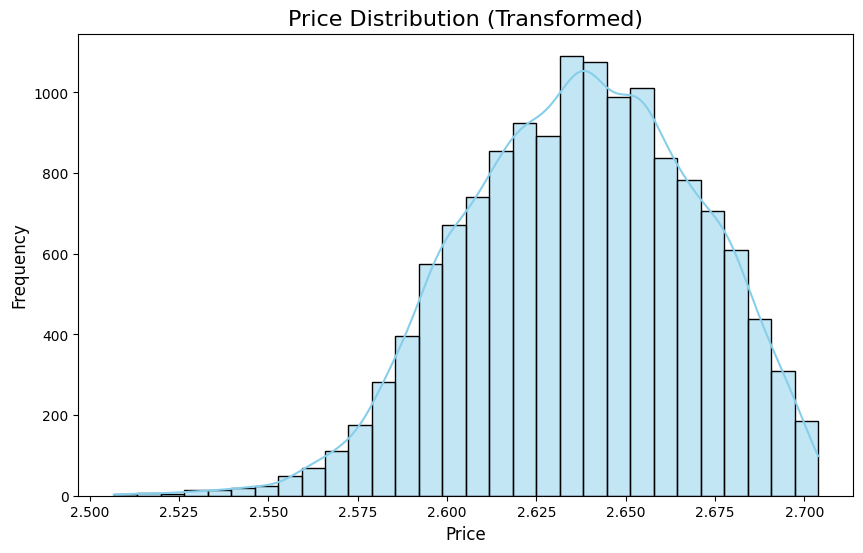

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution (Transformed)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [39]:
skewness = skew(data['lot area'])
print(skewness)

10.437316708504769


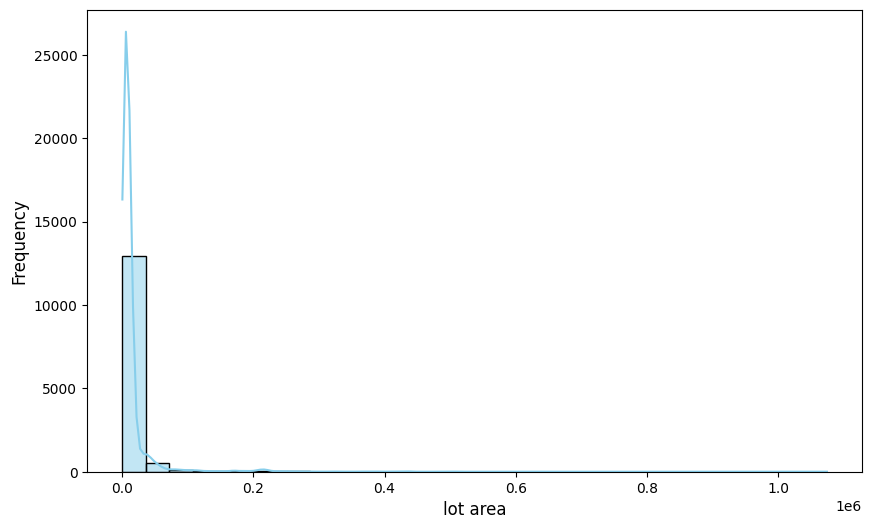

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data['lot area'], kde=True, color='skyblue', bins=30)

plt.xlabel('lot area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [41]:
data['lot area'] = np.log1p(data['lot area'])

In [42]:
skewness = skew(data['lot area'])
print(skewness)

0.9583271578577003


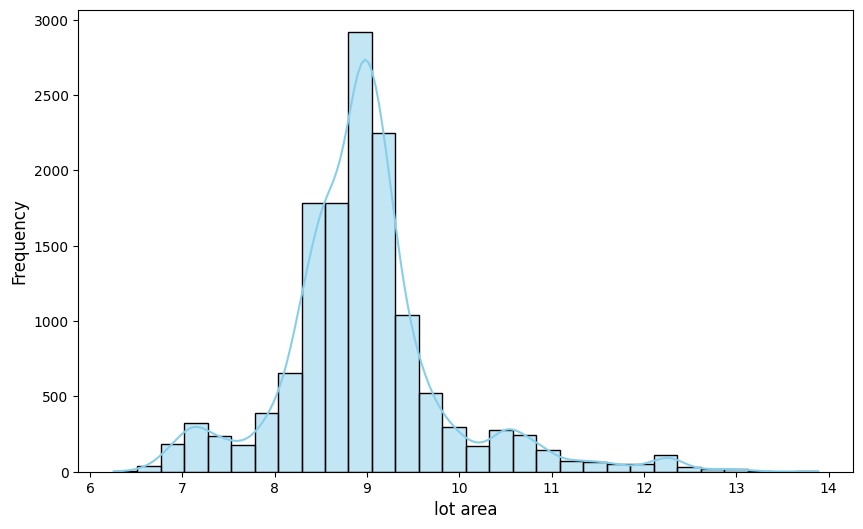

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['lot area'], kde=True, color='skyblue', bins=30)

plt.xlabel('lot area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [44]:
data['lot area'] = np.log1p(data['lot area'])

In [45]:
skewness = skew(data['lot area'])
print(skewness)

0.4091110420806651


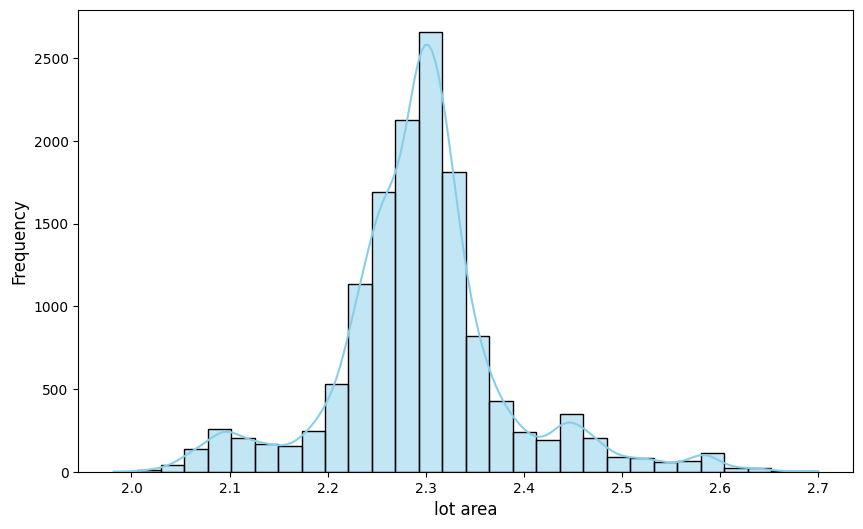

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data['lot area'], kde=True, color='skyblue', bins=30)

plt.xlabel('lot area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13859 entries, 0 to 13858
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number of bedrooms         13859 non-null  int64  
 1   number of bathrooms        13859 non-null  float64
 2   living area                13859 non-null  int64  
 3   lot area                   13859 non-null  float64
 4   number of floors           13859 non-null  float64
 5   condition of the house     13859 non-null  int64  
 6   grade of the house         13859 non-null  int64  
 7   Area of the basement       13859 non-null  int64  
 8   Built Year                 13859 non-null  int64  
 9   Renovation Year            13859 non-null  int64  
 10  Lattitude                  13859 non-null  float64
 11  Longitude                  13859 non-null  float64
 12  living_area_renov          13859 non-null  int64  
 13  lot_area_renov             13859 non-null  int

In [50]:
skewness = skew(data['Renovation Year'])
print(skewness)

4.663811686539595


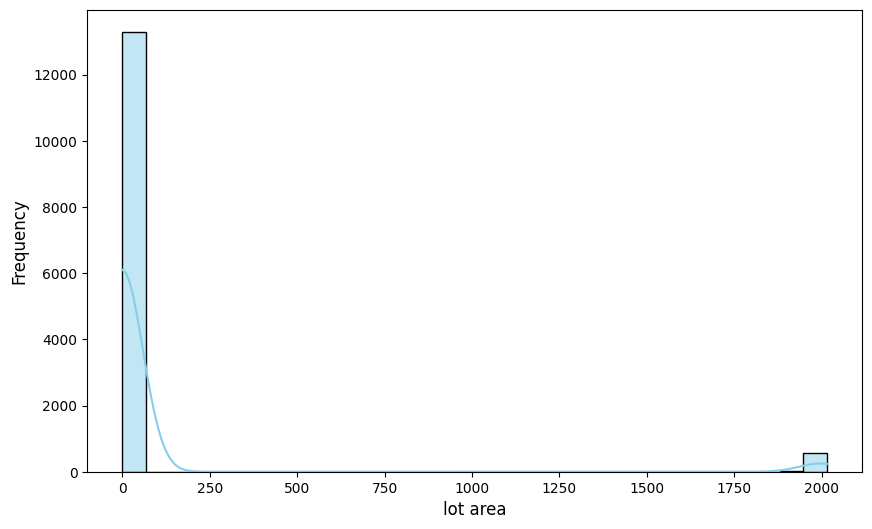

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Renovation Year'], kde=True, color='skyblue', bins=30)

plt.xlabel('lot area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [60]:
data['Renovation Year'] = np.log1p(data['Renovation Year'])

In [63]:
skewness = skew(data['Renovation Year'])
print(skewness)

nan


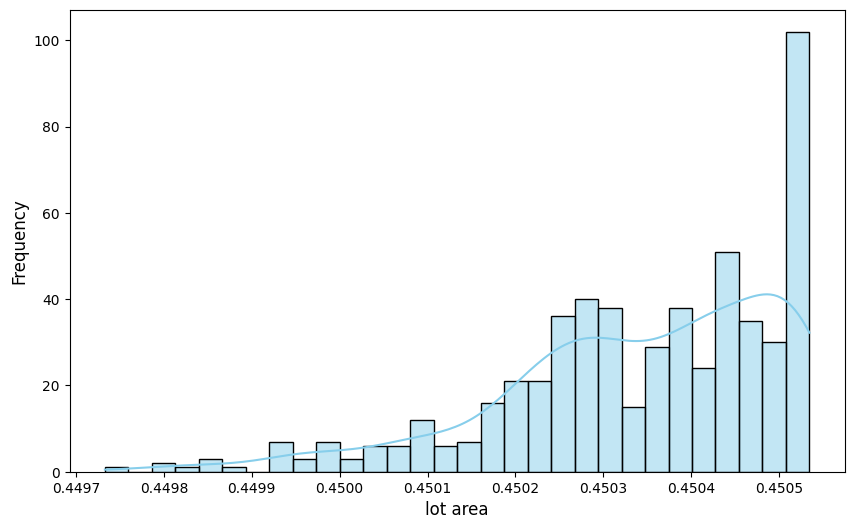

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Renovation Year'], kde=True, color='skyblue', bins=30)

plt.xlabel('lot area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [65]:
skewness = skew(data['Renovation Year'])
print(skewness)

nan
